In [1]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt

In [2]:
# Keep the outliers
def keepOnlyOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    #print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    #print(f"lower_range: {lower_range}")
    #print(f"upper_range: {upper_range}")
    outlier_list = [x for x in data[col] if (
        (x < lower_range) | (x > upper_range))]
    return data.loc[data[col].isin(outlier_list)] 

## EQT options

In [3]:
dir_path = 'results_train_14w'

In [4]:
with open(f'{dir_path}/n_beats_interval_14w_EQT_2007-2009.pkl', 'rb') as f:
    eqt_nbeats_mapes = pickle.load(f)

In [5]:
with open(f'{dir_path}/ETS_interval_14w_EQT_2007-2009.pkl', 'rb') as f:
    eqt_ETS_mapes = pickle.load(f)

In [6]:
with open(f'{dir_path}/prophet_interval_14w_EQT_2007-2009.pkl', 'rb') as f:
    eqt_prophet_mapes = pickle.load(f)

In [7]:
with open(f'{dir_path}/arima_interval_14w_EQT_2007-2009.pkl', 'rb') as f:
    eqt_arima_mapes = pickle.load(f)

In [8]:
def createDataFrame(list_of_tuples, column_name):
    "create dataframes from list of mapes, dates tuples, pick end date"
    df = pd.DataFrame(list(map(lambda x: (x[0], x[1][1]), list_of_tuples)),\
                      columns=[column_name, 'Date'])
    df.set_index('Date', inplace=True)
    return df 

In [9]:
eqt_arima_df = createDataFrame(eqt_arima_mapes, 'arima_mape')
eqt_ETS_df = createDataFrame(eqt_ETS_mapes, 'ETS_mape')
eqt_prophet_df = createDataFrame(eqt_prophet_mapes, 'prophet_mape')
eqt_nbeats_df = createDataFrame(eqt_nbeats_mapes, 'nbeats_mape').multiply(100) 

In [10]:
eqt_arima_df.head(3)

arima_mape
Date                  
2007-02-26   12.895988
2007-03-05   27.608425
2007-03-12   63.240113

In [11]:
eqt_ETS_df.head(3)

ETS_mape
Date                 
2007-02-26   7.979006
2007-03-05  34.407289
2007-03-12  16.218429

In [12]:
df = pd.concat([eqt_arima_df, eqt_ETS_df, eqt_prophet_df, eqt_nbeats_df],\
               axis=1)
df['wmape'] = (df['arima_mape'] + df['ETS_mape'] + df['prophet_mape'] + df['nbeats_mape'])/4
df.head(3)

arima_mape   ETS_mape  prophet_mape  nbeats_mape      wmape
Date                                                                   
2007-02-26   12.895988   7.979006      8.243764    16.534576  11.413333
2007-03-05   27.608425  34.407289     31.396031    53.377331  36.697269
2007-03-12   63.240113  16.218429      6.519239     5.566819  22.886150

In [13]:
eqt_prophet_df.head(3)

prophet_mape
Date                    
2007-02-26      8.243764
2007-03-05     31.396031
2007-03-12      6.519239

In [14]:
eqt_nbeats_df.head(3)

nbeats_mape
Date                   
2007-02-26    16.534576
2007-03-05    53.377331
2007-03-12     5.566819

We are taking 12 weeks moving windows for finding if last week is outlier. 

In [15]:
upper_limit = df.shape[0] - 12 
arima_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'arima_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        arima_anomaly.append(anomaly)
        print(anomaly)


2007-08-27 00:00:00
2007-10-15 00:00:00
2007-11-26 00:00:00
2008-02-04 00:00:00
2008-03-31 00:00:00
2008-08-25 00:00:00
2008-09-22 00:00:00
2008-12-29 00:00:00
2009-01-05 00:00:00
2009-05-11 00:00:00
2009-06-29 00:00:00
2009-07-06 00:00:00
2009-11-09 00:00:00
2009-12-28 00:00:00


In [16]:
upper_limit = df.shape[0] - 12 
ETS_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'ETS_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        ETS_anomaly.append(anomaly)
        print(anomaly)


2007-06-04 00:00:00
2007-07-23 00:00:00
2007-08-27 00:00:00
2007-10-22 00:00:00
2007-11-26 00:00:00
2008-03-31 00:00:00
2008-07-28 00:00:00
2008-08-25 00:00:00
2009-08-03 00:00:00
2009-08-24 00:00:00
2009-12-28 00:00:00


In [17]:
upper_limit = df.shape[0] - 12 
prophet_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'prophet_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        prophet_anomaly.append(anomaly)
        print(anomaly)

2007-08-27 00:00:00
2007-09-03 00:00:00
2007-11-26 00:00:00
2007-12-03 00:00:00
2008-12-29 00:00:00
2009-05-25 00:00:00
2009-12-28 00:00:00


In [18]:
upper_limit = df.shape[0] - 12 
nbeats_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'nbeats_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        nbeats_anomaly.append(anomaly)
        print(anomaly)

2007-07-23 00:00:00
2007-07-30 00:00:00
2008-01-21 00:00:00
2008-07-14 00:00:00
2008-09-15 00:00:00
2008-12-29 00:00:00
2009-04-20 00:00:00


In [19]:
upper_limit = df.shape[0] - 12 
wmape_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'wmape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        wmape_anomaly.append(anomaly)
        print(anomaly)

2007-08-27 00:00:00
2007-11-26 00:00:00
2008-03-31 00:00:00
2008-08-25 00:00:00
2008-12-29 00:00:00
2009-12-28 00:00:00


In [20]:
df.tail(3)

arima_mape   ETS_mape  prophet_mape  nbeats_mape      wmape
Date                                                                   
2010-02-01   27.016680  13.244800     24.036249    10.090614  18.597085
2010-02-08   20.236796  18.550217     17.484281    21.456479  19.431943
2010-02-15   13.826108  13.053999     25.865760    14.936664  16.920633

In [21]:
with open('EQT_options.pkl', 'rb') as f:
    eqt_opt = pickle.load(f)

<AxesSubplot:xlabel='Date'>

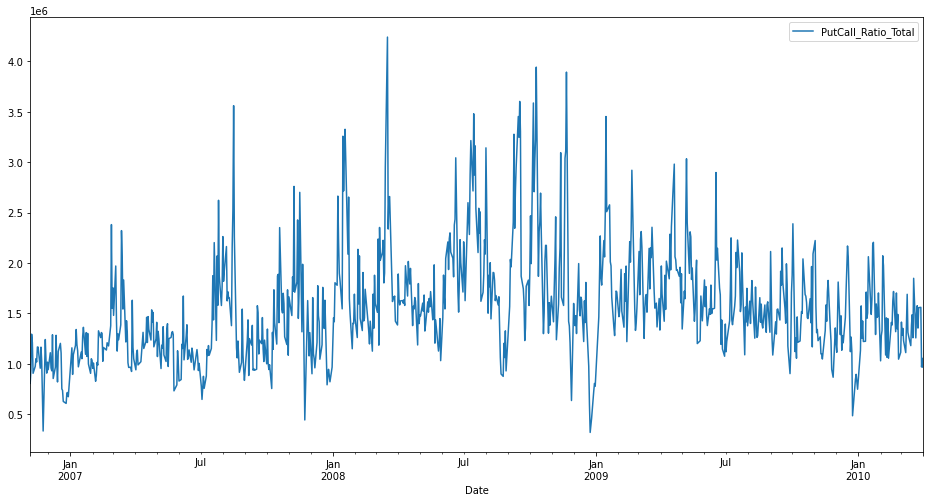

In [22]:
eqt_opt[:'2010-04-01'].plot(figsize=(16,8))

In [23]:
eqt_opt1 = eqt_opt[:'2010-04-01']

In [24]:
def outlier_detection(option_df, anomalies):
    """
    Add column 'anomaly' to dataframe to mark outliers as True, non-outliers as False. 
    """
    # identify outliers
    option_df = option_df.assign(anomaly = False)
    for idx in anomalies:
        option_df.loc[idx, 'anomaly'] = True
    
    return option_df

In [25]:
arima_detection = outlier_detection(eqt_opt1, arima_anomaly)
ETS_detection = outlier_detection(eqt_opt1, ETS_anomaly)
prophet_detection = outlier_detection(eqt_opt1, prophet_anomaly)
nbeats_detection = outlier_detection(eqt_opt1, nbeats_anomaly)
average_detection = outlier_detection(eqt_opt1, wmape_anomaly)

In [26]:
def visualize_outliers(anomaly_detection, model_name):
    anomaly_detection.reset_index(inplace=True)
    # visualization of outliers detected
    fig, ax = plt.subplots(figsize=(15,5))
    a = anomaly_detection[anomaly_detection['anomaly'] == True]  # anomaly
    ax.plot(anomaly_detection.Date, anomaly_detection['PutCall_Ratio_Total'], color='black', label = 'Normal')
    ax.scatter(a.Date, a['PutCall_Ratio_Total'], color='red', label = 'Anomaly')
    plt.title(f'Structural Break Detection with {model_name}')
    plt.legend()
    plt.show()


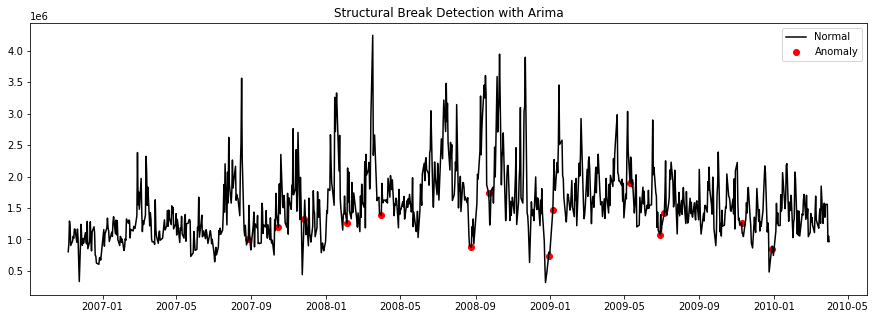

In [27]:
visualize_outliers(arima_detection, 'Arima') 

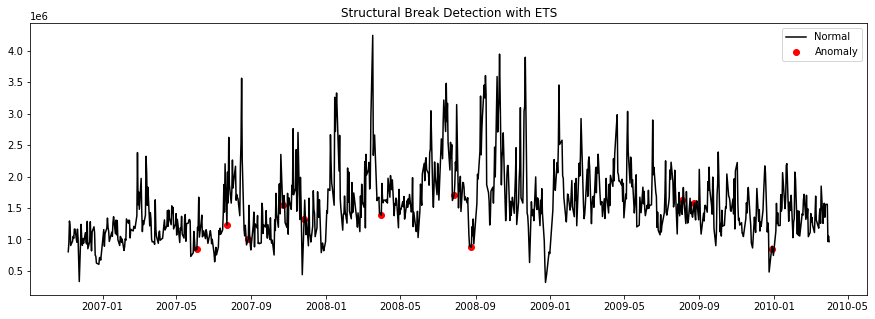

In [28]:
visualize_outliers(ETS_detection, 'ETS') 

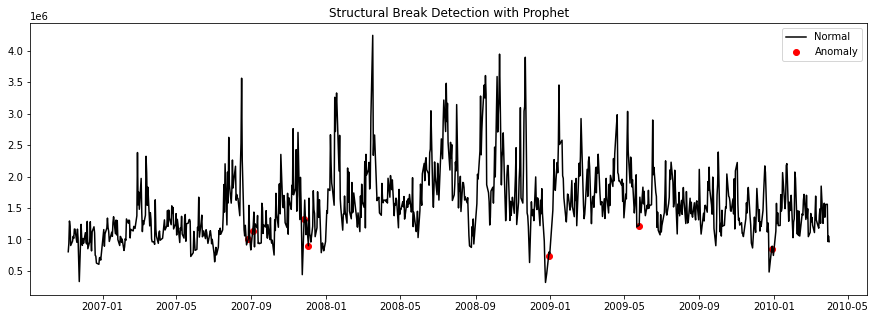

In [29]:
visualize_outliers(prophet_detection, 'Prophet') 

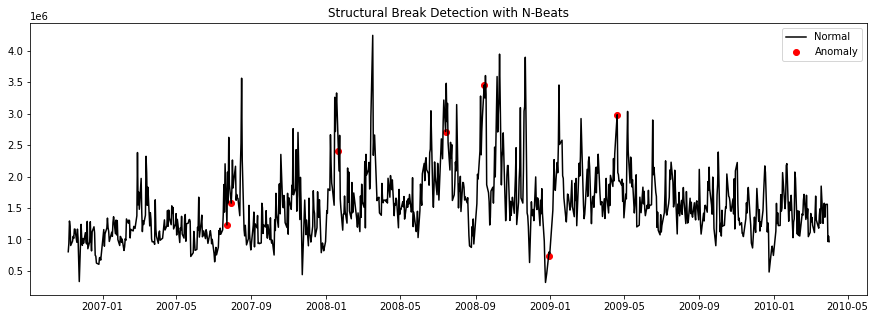

In [30]:
visualize_outliers(nbeats_detection, 'N-Beats') 

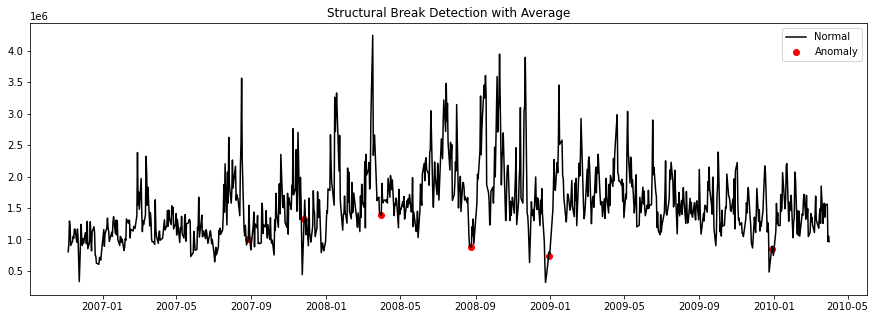

In [31]:
visualize_outliers(average_detection, 'Average') 